In [1]:
import httpx
from bs4 import BeautifulSoup
import csv
import random
import time
import pandas as pd
import os

# 记录已成功爬取的URL，用于断点续爬
success_urls_file = "success_urls.txt"
if os.path.exists(success_urls_file):
    with open(success_urls_file, 'r') as f:
        success_urls = set(line.strip() for line in f.readlines())
else:
    success_urls = set()

file = open('maoming_temp.csv', mode='a', encoding='utf-8', newline='')
csv_writer = csv.DictWriter(file, fieldnames=[
    "日期", "最高温", "最低温", "天气", "风力风向", "空气质量指数"
])
# 如果文件为空（首次运行），写入表头
if os.path.getsize('maoming_temp.csv') == 0:
    csv_writer.writeheader()

headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36",
    "cookie":"Hm_lvt_2d676824163d6ea7a346a715d31dce2d=1735192325; HMACCOUNT=351BA8A457E7C683; Hm_lpvt_2d676824163d6ea7a346a715d31dce2d=1735192359"
}

urls = []
for year in range(2019, 2024 + 1):
    for month in range(1, 12 + 1):
        url = "http://www.826226.com/lstq/440900_{}_{}/".format(year, month)
        urls.append(url)

for url in urls:
    try:
        if url in success_urls:
            continue
        # 请求数据
        response = httpx.get(url, headers=headers)
        # 分析数据
        soup = BeautifulSoup(response.text, "lxml")
        # 提取数据
        table = soup.find("table", attrs={"class": "history-table"})
        trs = table.findAll("tr")
        # 遍历数据
        for tr in trs[1:]:
            tds = tr.findAll("td")
            date = tds[0].text
            max_temp = tds[1].text
            min_temp = tds[2].text
            weather = tds[3].text
            windy = tds[4].text
            aqi = tds[5].text
            Dict = {"日期": date, "最高温": max_temp, "最低温": min_temp, "天气": weather, "风力风向": windy, "空气质量指数": aqi}
            print(Dict)  # 新增这行，打印当前提取的数据字典，可实时看到每行数据内容
            csv_writer.writerow(Dict)
        # 将成功爬取的URL记录下来
        with open(success_urls_file, 'a') as f:
            f.write(url + '\n')
        # 随机休眠几秒
        time.sleep(random.randint(3, 8))
    except:
        time.sleep(random.randint(5, 8))
        continue


{'日期': '2019-01-01 周二', '最高温': '15°', '最低温': '10°', '天气': '多云~小雨', '风力风向': '东北风2级', '空气质量指数': '42 优'}
{'日期': '2019-01-02 周三', '最高温': '16°', '最低温': '12°', '天气': '小雨', '风力风向': '西北风2级', '空气质量指数': '46 优'}
{'日期': '2019-01-03 周四', '最高温': '17°', '最低温': '14°', '天气': '小雨', '风力风向': '东北风2级', '空气质量指数': '60 良'}
{'日期': '2019-01-04 周五', '最高温': '21°', '最低温': '16°', '天气': '阴', '风力风向': '东北风2级', '空气质量指数': '59 良'}
{'日期': '2019-01-05 周六', '最高温': '24°', '最低温': '17°', '天气': '阴', '风力风向': '东北风2级', '空气质量指数': '67 良'}
{'日期': '2019-01-06 周日', '最高温': '23°', '最低温': '17°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '57 良'}
{'日期': '2019-01-07 周一', '最高温': '24°', '最低温': '16°', '天气': '阴', '风力风向': '东北风2级', '空气质量指数': '54 良'}
{'日期': '2019-01-08 周二', '最高温': '23°', '最低温': '15°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '63 良'}
{'日期': '2019-01-09 周三', '最高温': '24°', '最低温': '18°', '天气': '阴', '风力风向': '东北风3级', '空气质量指数': '53 良'}
{'日期': '2019-01-10 周四', '最高温': '23°', '最低温': '19°', '天气': '阴~多云', '风力风向': '东北风3级', '空气质量指数': '51 良'}
{'日期': '2

{'日期': '2019-05-01 周三', '最高温': '28°', '最低温': '23°', '天气': '阵雨~多云', '风力风向': '西南风2级', '空气质量指数': '38 优'}
{'日期': '2019-05-02 周四', '最高温': '29°', '最低温': '22°', '天气': '阵雨~多云', '风力风向': '东北风3级', '空气质量指数': '46 优'}
{'日期': '2019-05-03 周五', '最高温': '29°', '最低温': '22°', '天气': '多云', '风力风向': '东南风3级', '空气质量指数': '34 优'}
{'日期': '2019-05-04 周六', '最高温': '27°', '最低温': '23°', '天气': '阵雨~大雨', '风力风向': '东北风3级', '空气质量指数': '44 优'}
{'日期': '2019-05-05 周日', '最高温': '26°', '最低温': '22°', '天气': '大到暴雨', '风力风向': '东风3级', '空气质量指数': '34 优'}
{'日期': '2019-05-06 周一', '最高温': '27°', '最低温': '22°', '天气': '中雨~阵雨', '风力风向': '东南风3级', '空气质量指数': '32 优'}
{'日期': '2019-05-07 周二', '最高温': '27°', '最低温': '22°', '天气': '阵雨', '风力风向': '东北风3级', '空气质量指数': '14 优'}
{'日期': '2019-05-08 周三', '最高温': '26°', '最低温': '22°', '天气': '大雨~阵雨', '风力风向': '东北风3级', '空气质量指数': '18 优'}
{'日期': '2019-05-09 周四', '最高温': '27°', '最低温': '23°', '天气': '阵雨', '风力风向': '东南风2级', '空气质量指数': '35 优'}
{'日期': '2019-05-10 周五', '最高温': '29°', '最低温': '23°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '5

{'日期': '2019-08-01 周四', '最高温': '30°', '最低温': '24°', '天气': '大到暴雨~中雨', '风力风向': '东北风5级', '空气质量指数': '16 优'}
{'日期': '2019-08-02 周五', '最高温': '29°', '最低温': '25°', '天气': '大雨~中雨', '风力风向': '东南风4级', '空气质量指数': '20 优'}
{'日期': '2019-08-03 周六', '最高温': '31°', '最低温': '26°', '天气': '阵雨', '风力风向': '东北风4级', '空气质量指数': '22 优'}
{'日期': '2019-08-04 周日', '最高温': '31°', '最低温': '25°', '天气': '阵雨~中雨', '风力风向': '东北风3级', '空气质量指数': '23 优'}
{'日期': '2019-08-05 周一', '最高温': '33°', '最低温': '26°', '天气': '阵雨~多云', '风力风向': '东南风2级', '空气质量指数': '32 优'}
{'日期': '2019-08-06 周二', '最高温': '34°', '最低温': '25°', '天气': '多云~晴', '风力风向': '西北风2级', '空气质量指数': '38 优'}
{'日期': '2019-08-07 周三', '最高温': '35°', '最低温': '26°', '天气': '晴~多云', '风力风向': '东南风2级', '空气质量指数': '40 优'}
{'日期': '2019-08-08 周四', '最高温': '35°', '最低温': '26°', '天气': '雷阵雨~多云', '风力风向': '西北风2级', '空气质量指数': '45 优'}
{'日期': '2019-08-09 周五', '最高温': '36°', '最低温': '25°', '天气': '雷阵雨~阵雨', '风力风向': '西北风2级', '空气质量指数': '46 优'}
{'日期': '2019-08-10 周六', '最高温': '35°', '最低温': '26°', '天气': '阵雨~多云', '风力风向': '西南风2级',

{'日期': '2019-11-01 周五', '最高温': '30°', '最低温': '21°', '天气': '多云~晴', '风力风向': '东北风2级', '空气质量指数': '64 良'}
{'日期': '2019-11-02 周六', '最高温': '30°', '最低温': '21°', '天气': '晴', '风力风向': '东南风2级', '空气质量指数': '70 良'}
{'日期': '2019-11-03 周日', '最高温': '31°', '最低温': '20°', '天气': '晴~多云', '风力风向': '东北风2级', '空气质量指数': '74 良'}
{'日期': '2019-11-04 周一', '最高温': '30°', '最低温': '18°', '天气': '晴', '风力风向': '东北风2级', '空气质量指数': '68 良'}
{'日期': '2019-11-05 周二', '最高温': '29°', '最低温': '17°', '天气': '晴', '风力风向': '东北风2级', '空气质量指数': '70 良'}
{'日期': '2019-11-06 周三', '最高温': '29°', '最低温': '18°', '天气': '晴', '风力风向': '东北风2级', '空气质量指数': '74 良'}
{'日期': '2019-11-07 周四', '最高温': '29°', '最低温': '16°', '天气': '多云', '风力风向': '西北风2级', '空气质量指数': '78 良'}
{'日期': '2019-11-08 周五', '最高温': '28°', '最低温': '16°', '天气': '晴', '风力风向': '东北风2级', '空气质量指数': '59 良'}
{'日期': '2019-11-09 周六', '最高温': '28°', '最低温': '16°', '天气': '晴', '风力风向': '东北风2级', '空气质量指数': '62 良'}
{'日期': '2019-11-10 周日', '最高温': '28°', '最低温': '17°', '天气': '晴', '风力风向': '东北风2级', '空气质量指数': '75 良'}
{'日期': '2019-

{'日期': '2020-03-01 周日', '最高温': '26°', '最低温': '19°', '天气': '阴~多云', '风力风向': '东南风2级', '空气质量指数': '43 优'}
{'日期': '2020-03-02 周一', '最高温': '26°', '最低温': '20°', '天气': '多云~阴', '风力风向': '东南风4级', '空气质量指数': '41 优'}
{'日期': '2020-03-03 周二', '最高温': '23°', '最低温': '19°', '天气': '阴~阵雨', '风力风向': '东南风4级', '空气质量指数': '36 优'}
{'日期': '2020-03-04 周三', '最高温': '22°', '最低温': '16°', '天气': '中雨~阵雨', '风力风向': '东北风3级', '空气质量指数': '29 优'}
{'日期': '2020-03-05 周四', '最高温': '22°', '最低温': '17°', '天气': '小雨~阴', '风力风向': '东风3级', '空气质量指数': '23 优'}
{'日期': '2020-03-06 周五', '最高温': '22°', '最低温': '20°', '天气': '小雨~阴', '风力风向': '东南风3级', '空气质量指数': '37 优'}
{'日期': '2020-03-07 周六', '最高温': '27°', '最低温': '21°', '天气': '阴', '风力风向': '东南风3级', '空气质量指数': '28 优'}
{'日期': '2020-03-08 周日', '最高温': '26°', '最低温': '22°', '天气': '小雨~阵雨', '风力风向': '东南风3级', '空气质量指数': '25 优'}
{'日期': '2020-03-09 周一', '最高温': '28°', '最低温': '18°', '天气': '小雨~雷阵雨', '风力风向': '东南风3级', '空气质量指数': '37 优'}
{'日期': '2020-03-10 周二', '最高温': '27°', '最低温': '17°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': 

{'日期': '2020-06-01 周一', '最高温': '32°', '最低温': '26°', '天气': '阴~大雨', '风力风向': '东南风3级', '空气质量指数': '39 优'}
{'日期': '2020-06-02 周二', '最高温': '32°', '最低温': '25°', '天气': '阴~阵雨', '风力风向': '东南风3级', '空气质量指数': '28 优'}
{'日期': '2020-06-03 周三', '最高温': '32°', '最低温': '25°', '天气': '阴~阵雨', '风力风向': '东南风3级', '空气质量指数': '21 优'}
{'日期': '2020-06-04 周四', '最高温': '33°', '最低温': '25°', '天气': '小雨~多云', '风力风向': '东南风3级', '空气质量指数': '25 优'}
{'日期': '2020-06-05 周五', '最高温': '32°', '最低温': '26°', '天气': '大雨~中雨', '风力风向': '东南风3级', '空气质量指数': '26 优'}
{'日期': '2020-06-06 周六', '最高温': '33°', '最低温': '25°', '天气': '阴~阵雨', '风力风向': '东南风2级', '空气质量指数': '31 优'}
{'日期': '2020-06-07 周日', '最高温': '33°', '最低温': '26°', '天气': '阴~阵雨', '风力风向': '南风3级', '空气质量指数': '33 优'}
{'日期': '2020-06-08 周一', '最高温': '34°', '最低温': '27°', '天气': '阴', '风力风向': '东南风3级', '空气质量指数': '33 优'}
{'日期': '2020-06-09 周二', '最高温': '34°', '最低温': '27°', '天气': '中雨~多云', '风力风向': '东南风3级', '空气质量指数': '36 优'}
{'日期': '2020-06-10 周三', '最高温': '32°', '最低温': '26°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数':

{'日期': '2020-11-01 周日', '最高温': '29°', '最低温': '20°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '78 良'}
{'日期': '2020-11-02 周一', '最高温': '29°', '最低温': '19°', '天气': '阴~多云', '风力风向': '北风1级', '空气质量指数': '89 良'}
{'日期': '2020-11-03 周二', '最高温': '27°', '最低温': '19°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '45 优'}
{'日期': '2020-11-04 周三', '最高温': '27°', '最低温': '20°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '63 良'}
{'日期': '2020-11-05 周四', '最高温': '27°', '最低温': '18°', '天气': '多云', '风力风向': '东风2级', '空气质量指数': '77 良'}
{'日期': '2020-11-06 周五', '最高温': '29°', '最低温': '19°', '天气': '晴~多云', '风力风向': '东北风1级', '空气质量指数': '91 良'}
{'日期': '2020-11-07 周六', '最高温': '30°', '最低温': '20°', '天气': '多云~晴', '风力风向': '西北风2级', '空气质量指数': '90 良'}
{'日期': '2020-11-08 周日', '最高温': '30°', '最低温': '18°', '天气': '晴', '风力风向': '东北风2级', '空气质量指数': '60 良'}
{'日期': '2020-11-09 周一', '最高温': '29°', '最低温': '18°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '63 良'}
{'日期': '2020-11-10 周二', '最高温': '26°', '最低温': '19°', '天气': '阴~多云', '风力风向': '东北风2级', '空气质量指数': '68 良'}
{'日期'

{'日期': '2021-02-01 周一', '最高温': '26°', '最低温': '15°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '47 优'}
{'日期': '2021-02-02 周二', '最高温': '25°', '最低温': '16°', '天气': '雾~多云', '风力风向': '东南风2级', '空气质量指数': '58 良'}
{'日期': '2021-02-03 周三', '最高温': '25°', '最低温': '15°', '天气': '多云~晴', '风力风向': '东南风3级', '空气质量指数': '57 良'}
{'日期': '2021-02-04 周四', '最高温': '26°', '最低温': '15°', '天气': '晴', '风力风向': '东南风3级', '空气质量指数': '56 良'}
{'日期': '2021-02-05 周五', '最高温': '27°', '最低温': '13°', '天气': '多云~晴', '风力风向': '东南风3级', '空气质量指数': '57 良'}
{'日期': '2021-02-06 周六', '最高温': '28°', '最低温': '13°', '天气': '多云~晴', '风力风向': '东南风2级', '空气质量指数': '58 良'}
{'日期': '2021-02-07 周日', '最高温': '28°', '最低温': '15°', '天气': '晴~多云', '风力风向': '东南风2级', '空气质量指数': '53 良'}
{'日期': '2021-02-08 周一', '最高温': '25°', '最低温': '17°', '天气': '阴~中雨', '风力风向': '东北风2级', '空气质量指数': '58 良'}
{'日期': '2021-02-09 周二', '最高温': '19°', '最低温': '13°', '天气': '小雨~大雨', '风力风向': '东北风微风', '空气质量指数': '55 良'}
{'日期': '2021-02-10 周三', '最高温': '17°', '最低温': '13°', '天气': '小雨~多云', '风力风向': '北风2级', '空气质量指数': '1

{'日期': '2021-06-01 周二', '最高温': '34°', '最低温': '27°', '天气': '雷阵雨~多云', '风力风向': '东南风2级', '空气质量指数': '32 优'}
{'日期': '2021-06-02 周三', '最高温': '33°', '最低温': '27°', '天气': '中雨~阵雨', '风力风向': '东南风3级', '空气质量指数': '33 优'}
{'日期': '2021-06-03 周四', '最高温': '33°', '最低温': '25°', '天气': '阴~大雨', '风力风向': '东南风3级', '空气质量指数': '31 优'}
{'日期': '2021-06-04 周五', '最高温': '30°', '最低温': '25°', '天气': '阴~阵雨', '风力风向': '西北风3级', '空气质量指数': '27 优'}
{'日期': '2021-06-05 周六', '最高温': '31°', '最低温': '24°', '天气': '阴~多云', '风力风向': '西北风2级', '空气质量指数': '37 优'}
{'日期': '2021-06-06 周日', '最高温': '34°', '最低温': '24°', '天气': '晴~多云', '风力风向': '东南风2级', '空气质量指数': '52 良'}
{'日期': '2021-06-07 周一', '最高温': '34°', '最低温': '25°', '天气': '多云', '风力风向': '东南风3级', '空气质量指数': '53 良'}
{'日期': '2021-06-08 周二', '最高温': '33°', '最低温': '25°', '天气': '小雨~阵雨', '风力风向': '东南风3级', '空气质量指数': '35 优'}
{'日期': '2021-06-09 周三', '最高温': '32°', '最低温': '25°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数': '20 优'}
{'日期': '2021-06-10 周四', '最高温': '32°', '最低温': '26°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指

{'日期': '2021-09-01 周三', '最高温': '31°', '最低温': '25°', '天气': '雾~多云', '风力风向': '东风2级', '空气质量指数': '31 优'}
{'日期': '2021-09-02 周四', '最高温': '32°', '最低温': '25°', '天气': '多云', '风力风向': '东风3级', '空气质量指数': '21 优'}
{'日期': '2021-09-03 周五', '最高温': '33°', '最低温': '25°', '天气': '雷阵雨~多云', '风力风向': '东南风2级', '空气质量指数': '17 优'}
{'日期': '2021-09-04 周六', '最高温': '33°', '最低温': '25°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '15 优'}
{'日期': '2021-09-05 周日', '最高温': '32°', '最低温': '25°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '16 优'}
{'日期': '2021-09-06 周一', '最高温': '34°', '最低温': '25°', '天气': '多云~雷阵雨', '风力风向': '东风2级', '空气质量指数': '26 优'}
{'日期': '2021-09-07 周二', '最高温': '34°', '最低温': '25°', '天气': '多云~阵雨', '风力风向': '东风3级', '空气质量指数': '32 优'}
{'日期': '2021-09-08 周三', '最高温': '34°', '最低温': '25°', '天气': '多云', '风力风向': '东风2级', '空气质量指数': '24 优'}
{'日期': '2021-09-09 周四', '最高温': '35°', '最低温': '25°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '31 优'}
{'日期': '2021-09-10 周五', '最高温': '34°', '最低温': '26°', '天气': '多云', '风力风向': '东风2级', '空气质量指数': '43 优'}
{'日

{'日期': '2021-12-01 周三', '最高温': '23°', '最低温': '10°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '43 优'}
{'日期': '2021-12-02 周四', '最高温': '23°', '最低温': '9°', '天气': '多云~晴', '风力风向': '东北风1级', '空气质量指数': '52 良'}
{'日期': '2021-12-03 周五', '最高温': '25°', '最低温': '9°', '天气': '多云~晴', '风力风向': '北风2级', '空气质量指数': '57 良'}
{'日期': '2021-12-04 周六', '最高温': '24°', '最低温': '9°', '天气': '多云~晴', '风力风向': '东北风2级', '空气质量指数': '43 优'}
{'日期': '2021-12-05 周日', '最高温': '24°', '最低温': '8°', '天气': '多云~晴', '风力风向': '东北风2级', '空气质量指数': '60 良'}
{'日期': '2021-12-06 周一', '最高温': '24°', '最低温': '10°', '天气': '多云~晴', '风力风向': '东北风2级', '空气质量指数': '51 良'}
{'日期': '2021-12-07 周二', '最高温': '25°', '最低温': '13°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '57 良'}
{'日期': '2021-12-08 周三', '最高温': '27°', '最低温': '15°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '62 良'}
{'日期': '2021-12-09 周四', '最高温': '26°', '最低温': '15°', '天气': '多云', '风力风向': '东风2级', '空气质量指数': '63 良'}
{'日期': '2021-12-10 周五', '最高温': '26°', '最低温': '16°', '天气': '多云', '风力风向': '东南风3级', '空气质量指数': '78 良'}
{'日期':

{'日期': '2022-03-01 周二', '最高温': '26°', '最低温': '17°', '天气': '阴~多云', '风力风向': '东南风2级', '空气质量指数': '50 优'}
{'日期': '2022-03-02 周三', '最高温': '28°', '最低温': '17°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '83 良'}
{'日期': '2022-03-03 周四', '最高温': '26°', '最低温': '19°', '天气': '阴', '风力风向': '东南风3级', '空气质量指数': '62 良'}
{'日期': '2022-03-04 周五', '最高温': '25°', '最低温': '18°', '天气': '雾~多云', '风力风向': '东南风3级', '空气质量指数': '51 良'}
{'日期': '2022-03-05 周六', '最高温': '29°', '最低温': '19°', '天气': '雾~多云', '风力风向': '东南风2级', '空气质量指数': '56 良'}
{'日期': '2022-03-06 周日', '最高温': '25°', '最低温': '16°', '天气': '阴~雷阵雨', '风力风向': '东南风3级', '空气质量指数': '44 优'}
{'日期': '2022-03-07 周一', '最高温': '26°', '最低温': '11°', '天气': '阴~晴', '风力风向': '东北风2级', '空气质量指数': '31 优'}
{'日期': '2022-03-08 周二', '最高温': '25°', '最低温': '11°', '天气': '多云~晴', '风力风向': '东南风3级', '空气质量指数': '51 良'}
{'日期': '2022-03-09 周三', '最高温': '25°', '最低温': '14°', '天气': '晴', '风力风向': '东南风3级', '空气质量指数': '35 优'}
{'日期': '2022-03-10 周四', '最高温': '27°', '最低温': '18°', '天气': '多云', '风力风向': '东南风3级', '空气质量指数': '39 优'}


{'日期': '2022-06-01 周三', '最高温': '32°', '最低温': '26°', '天气': '雾~多云', '风力风向': '东南风3级', '空气质量指数': '33 优'}
{'日期': '2022-06-02 周四', '最高温': '33°', '最低温': '26°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '28 优'}
{'日期': '2022-06-03 周五', '最高温': '34°', '最低温': '27°', '天气': '多云', '风力风向': '南风2级', '空气质量指数': '29 优'}
{'日期': '2022-06-04 周六', '最高温': '34°', '最低温': '27°', '天气': '多云~阵雨', '风力风向': '东南风3级', '空气质量指数': '29 优'}
{'日期': '2022-06-05 周日', '最高温': '34°', '最低温': '26°', '天气': '多云~雷阵雨', '风力风向': '东南风2级', '空气质量指数': '27 优'}
{'日期': '2022-06-06 周一', '最高温': '32°', '最低温': '25°', '天气': '大暴雨~大雨', '风力风向': '西南风2级', '空气质量指数': '27 优'}
{'日期': '2022-06-07 周二', '最高温': '32°', '最低温': '25°', '天气': '小雨~大雨', '风力风向': '西风2级', '空气质量指数': '27 优'}
{'日期': '2022-06-08 周三', '最高温': '25°', '最低温': '24°', '天气': '大雨~中雨', '风力风向': '南风2级', '空气质量指数': '21 优'}
{'日期': '2022-06-09 周四', '最高温': '27°', '最低温': '24°', '天气': '中雨~大雨', '风力风向': '东南风2级', '空气质量指数': '21 优'}
{'日期': '2022-06-10 周五', '最高温': '32°', '最低温': '25°', '天气': '小雨~中雨', '风力风向': '东南风2级', '空气质量指

{'日期': '2022-09-01 周四', '最高温': '33°', '最低温': '25°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '35 优'}
{'日期': '2022-09-02 周五', '最高温': '33°', '最低温': '25°', '天气': '小雨~多云', '风力风向': '北风2级', '空气质量指数': '39 优'}
{'日期': '2022-09-03 周六', '最高温': '33°', '最低温': '24°', '天气': '多云~晴', '风力风向': '西北风2级', '空气质量指数': '44 优'}
{'日期': '2022-09-04 周日', '最高温': '33°', '最低温': '23°', '天气': '多云~晴', '风力风向': '西北风3级', '空气质量指数': '54 良'}
{'日期': '2022-09-05 周一', '最高温': '34°', '最低温': '24°', '天气': '多云', '风力风向': '西北风2级', '空气质量指数': '55 良'}
{'日期': '2022-09-06 周二', '最高温': '35°', '最低温': '23°', '天气': '多云', '风力风向': '东风2级', '空气质量指数': '63 良'}
{'日期': '2022-09-07 周三', '最高温': '32°', '最低温': '25°', '天气': '多云~雷阵雨', '风力风向': '东风3级', '空气质量指数': '61 良'}
{'日期': '2022-09-08 周四', '最高温': '31°', '最低温': '24°', '天气': '大雨~雷阵雨', '风力风向': '东北风2级', '空气质量指数': '21 优'}
{'日期': '2022-09-09 周五', '最高温': '34°', '最低温': '24°', '天气': '多云~雷阵雨', '风力风向': '东风2级', '空气质量指数': '34 优'}
{'日期': '2022-09-10 周六', '最高温': '34°', '最低温': '23°', '天气': '多云', '风力风向': '西北风2级', '空气质量指数': '46

{'日期': '2022-12-01 周四', '最高温': '16°', '最低温': '11°', '天气': '多云~阴', '风力风向': '北风2级', '空气质量指数': '21 优'}
{'日期': '2022-12-02 周五', '最高温': '15°', '最低温': '13°', '天气': '多云~阴', '风力风向': '西北风2级', '空气质量指数': '19 优'}
{'日期': '2022-12-03 周六', '最高温': '21°', '最低温': '14°', '天气': '多云', '风力风向': '北风1级', '空气质量指数': '31 优'}
{'日期': '2022-12-04 周日', '最高温': '21°', '最低温': '13°', '天气': '多云~阴', '风力风向': '西北风2级', '空气质量指数': '39 优'}
{'日期': '2022-12-05 周一', '最高温': '17°', '最低温': '10°', '天气': '多云~阴', '风力风向': '西北风3级', '空气质量指数': '25 优'}
{'日期': '2022-12-06 周二', '最高温': '21°', '最低温': '12°', '天气': '多云', '风力风向': '东北风1级', '空气质量指数': '37 优'}
{'日期': '2022-12-07 周三', '最高温': '22°', '最低温': '13°', '天气': '多云', '风力风向': '西北风2级', '空气质量指数': '51 良'}
{'日期': '2022-12-08 周四', '最高温': '24°', '最低温': '14°', '天气': '多云', '风力风向': '北风1级', '空气质量指数': '54 良'}
{'日期': '2022-12-09 周五', '最高温': '24°', '最低温': '13°', '天气': '多云', '风力风向': '北风1级', '空气质量指数': '58 良'}
{'日期': '2022-12-10 周六', '最高温': '22°', '最低温': '12°', '天气': '多云~晴', '风力风向': '西北风2级', '空气质量指数': '57 良'}
{'日期

{'日期': '2023-03-01 周三', '最高温': '26°', '最低温': '14°', '天气': '雾~晴', '风力风向': '南风1级', '空气质量指数': '53 良'}
{'日期': '2023-03-02 周四', '最高温': '27°', '最低温': '14°', '天气': '雾~晴', '风力风向': '东南风3级', '空气质量指数': '71 良'}
{'日期': '2023-03-03 周五', '最高温': '25°', '最低温': '16°', '天气': '雾~多云', '风力风向': '东南风3级', '空气质量指数': '66 良'}
{'日期': '2023-03-04 周六', '最高温': '25°', '最低温': '16°', '天气': '多云', '风力风向': '东南风1级', '空气质量指数': '90 良'}
{'日期': '2023-03-05 周日', '最高温': '26°', '最低温': '14°', '天气': '多云~晴', '风力风向': '东南风3级', '空气质量指数': '74 良'}
{'日期': '2023-03-06 周一', '最高温': '25°', '最低温': '15°', '天气': '晴', '风力风向': '东南风3级', '空气质量指数': '56 良'}
{'日期': '2023-03-07 周二', '最高温': '26°', '最低温': '15°', '天气': '多云~晴', '风力风向': '东南风3级', '空气质量指数': '51 良'}
{'日期': '2023-03-08 周三', '最高温': '25°', '最低温': '17°', '天气': '雾~多云', '风力风向': '东南风3级', '空气质量指数': '47 优'}
{'日期': '2023-03-09 周四', '最高温': '28°', '最低温': '18°', '天气': '多云', '风力风向': '南风1级', '空气质量指数': '66 良'}
{'日期': '2023-03-10 周五', '最高温': '28°', '最低温': '17°', '天气': '雾~多云', '风力风向': '东南风4级', '空气质量指数': '60 良'}
{

{'日期': '2023-06-01 周四', '最高温': '35°', '最低温': '26°', '天气': '多云', '风力风向': '西南风1级', '空气质量指数': '36 优'}
{'日期': '2023-06-02 周五', '最高温': '35°', '最低温': '26°', '天气': '多云', '风力风向': '东南风2级', '空气质量指数': '28 优'}
{'日期': '2023-06-03 周六', '最高温': '36°', '最低温': '27°', '天气': '多云', '风力风向': '东南风3级', '空气质量指数': '26 优'}
{'日期': '2023-06-04 周日', '最高温': '33°', '最低温': '26°', '天气': '中雨~多云', '风力风向': '东南风3级', '空气质量指数': '21 优'}
{'日期': '2023-06-05 周一', '最高温': '34°', '最低温': '26°', '天气': '雷阵雨~多云', '风力风向': '东南风3级', '空气质量指数': '19 优'}
{'日期': '2023-06-06 周二', '最高温': '33°', '最低温': '25°', '天气': '中雨', '风力风向': '东北风3级', '空气质量指数': '20 优'}
{'日期': '2023-06-07 周三', '最高温': '28°', '最低温': '25°', '天气': '中雨', '风力风向': '东南风3级', '空气质量指数': '16 优'}
{'日期': '2023-06-08 周四', '最高温': '31°', '最低温': '25°', '天气': '多云~雷阵雨', '风力风向': '东南风2级', '空气质量指数': '20 优'}
{'日期': '2023-06-09 周五', '最高温': '33°', '最低温': '26°', '天气': '阵雨~中雨', '风力风向': '东南风2级', '空气质量指数': '21 优'}
{'日期': '2023-06-10 周六', '最高温': '31°', '最低温': '26°', '天气': '中雨~阵雨', '风力风向': '东南风2级', '空气质量指数': '

{'日期': '2023-09-01 周五', '最高温': '34°', '最低温': '25°', '天气': '阴~阵雨', '风力风向': '西北风3级', '空气质量指数': '34 优'}
{'日期': '2023-09-02 周六', '最高温': '26°', '最低温': '24°', '天气': '中雨~大暴雨', '风力风向': '西北风5级', '空气质量指数': '28 优'}
{'日期': '2023-09-03 周日', '最高温': '30°', '最低温': '24°', '天气': '多云~阵雨', '风力风向': '东南风3级', '空气质量指数': '22 优'}
{'日期': '2023-09-04 周一', '最高温': '34°', '最低温': '25°', '天气': '小雨~多云', '风力风向': '东北风1级', '空气质量指数': '26 优'}
{'日期': '2023-09-05 周二', '最高温': '35°', '最低温': '25°', '天气': '阴~多云', '风力风向': '西北风2级', '空气质量指数': '29 优'}
{'日期': '2023-09-06 周三', '最高温': '35°', '最低温': '26°', '天气': '阴~多云', '风力风向': '西北风2级', '空气质量指数': '39 优'}
{'日期': '2023-09-07 周四', '最高温': '35°', '最低温': '25°', '天气': '阴~中雨', '风力风向': '西北风1级', '空气质量指数': '33 优'}
{'日期': '2023-09-08 周五', '最高温': '27°', '最低温': '25°', '天气': '小雨~大雨', '风力风向': '东北风1级', '空气质量指数': '21 优'}
{'日期': '2023-09-09 周六', '最高温': '26°', '最低温': '24°', '天气': '大雨~暴雨', '风力风向': '东南风3级', '空气质量指数': '19 优'}
{'日期': '2023-09-10 周日', '最高温': '26°', '最低温': '24°', '天气': '暴雨', '风力风向': '东南风3级', '空气质

{'日期': '2024-01-01 周一', '最高温': '25°', '最低温': '16°', '天气': '多云', '风力风向': '东南风4级', '空气质量指数': '63 良'}
{'日期': '2024-01-02 周二', '最高温': '22°', '最低温': '16°', '天气': '小雨~多云', '风力风向': '东南风3级', '空气质量指数': '59 良'}
{'日期': '2024-01-03 周三', '最高温': '22°', '最低温': '14°', '天气': '多云', '风力风向': '西北风1级', '空气质量指数': '48 优'}
{'日期': '2024-01-04 周四', '最高温': '23°', '最低温': '14°', '天气': '多云', '风力风向': '东南风3级', '空气质量指数': '42 优'}
{'日期': '2024-01-05 周五', '最高温': '24°', '最低温': '16°', '天气': '多云~阴', '风力风向': '东南风3级', '空气质量指数': '50 优'}
{'日期': '2024-01-06 周六', '最高温': '25°', '最低温': '14°', '天气': '多云~中雨', '风力风向': '东南风2级', '空气质量指数': '51 良'}
{'日期': '2024-01-07 周日', '最高温': '20°', '最低温': '14°', '天气': '阴', '风力风向': '东南风3级', '空气质量指数': '65 良'}
{'日期': '2024-01-08 周一', '最高温': '25°', '最低温': '17°', '天气': '雾~多云', '风力风向': '东南风3级', '空气质量指数': '53 良'}
{'日期': '2024-01-09 周二', '最高温': '25°', '最低温': '17°', '天气': '雾~多云', '风力风向': '东南风2级', '空气质量指数': '53 良'}
{'日期': '2024-01-10 周三', '最高温': '25°', '最低温': '16°', '天气': '小雨~多云', '风力风向': '东南风2级', '空气质量指数': '46 

{'日期': '2024-04-01 周一', '最高温': '31°', '最低温': '24°', '天气': '多云', '风力风向': '东南风4级', '空气质量指数': '39 优'}
{'日期': '2024-04-02 周二', '最高温': '29°', '最低温': '24°', '天气': '多云', '风力风向': '东南风4级', '空气质量指数': '39 优'}
{'日期': '2024-04-03 周三', '最高温': '28°', '最低温': '25°', '天气': '阴~多云', '风力风向': '东南风4级', '空气质量指数': '34 优'}
{'日期': '2024-04-04 周四', '最高温': '28°', '最低温': '24°', '天气': '阴~阵雨', '风力风向': '东南风4级', '空气质量指数': '33 优'}
{'日期': '2024-04-05 周五', '最高温': '27°', '最低温': '24°', '天气': '阴~雷阵雨', '风力风向': '东南风4级', '空气质量指数': '32 优'}
{'日期': '2024-04-06 周六', '最高温': '27°', '最低温': '25°', '天气': '中雨~阴', '风力风向': '东南风4级', '空气质量指数': '41 优'}
{'日期': '2024-04-07 周日', '最高温': '27°', '最低温': '24°', '天气': '阴~多云', '风力风向': '东南风4级', '空气质量指数': '36 优'}
{'日期': '2024-04-08 周一', '最高温': '27°', '最低温': '22°', '天气': '小雨~阵雨', '风力风向': '东南风3级', '空气质量指数': '38 优'}
{'日期': '2024-04-09 周二', '最高温': '26°', '最低温': '22°', '天气': '阴~多云', '风力风向': '东风2级', '空气质量指数': '30 优'}
{'日期': '2024-04-10 周三', '最高温': '26°', '最低温': '22°', '天气': '阴', '风力风向': '东南风4级', '空气质量指数': '47 

{'日期': '2024-07-01 周一', '最高温': '34°', '最低温': '27°', '天气': '阴~多云', '风力风向': '南风3级', '空气质量指数': '26 优'}
{'日期': '2024-07-02 周二', '最高温': '32°', '最低温': '26°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数': '24 优'}
{'日期': '2024-07-03 周三', '最高温': '33°', '最低温': '27°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数': '21 优'}
{'日期': '2024-07-04 周四', '最高温': '33°', '最低温': '27°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数': '22 优'}
{'日期': '2024-07-05 周五', '最高温': '33°', '最低温': '26°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数': '17 优'}
{'日期': '2024-07-06 周六', '最高温': '33°', '最低温': '26°', '天气': '小雨~多云', '风力风向': '东南风3级', '空气质量指数': '14 优'}
{'日期': '2024-07-07 周日', '最高温': '34°', '最低温': '26°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数': '14 优'}
{'日期': '2024-07-08 周一', '最高温': '33°', '最低温': '26°', '天气': '小雨~多云', '风力风向': '东南风3级', '空气质量指数': '17 优'}
{'日期': '2024-07-09 周二', '最高温': '34°', '最低温': '27°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数': '17 优'}
{'日期': '2024-07-10 周三', '最高温': '33°', '最低温': '26°', '天气': '阴~多云', '风力风向': '东南风3级', '空气质量指数

{'日期': '2024-11-01 周五', '最高温': '30°', '最低温': '19°', '天气': '晴', '风力风向': '西北风2级', '空气质量指数': '52 良'}
{'日期': '2024-11-02 周六', '最高温': '27°', '最低温': '21°', '天气': '多云', '风力风向': '东北风2级', '空气质量指数': '44 优'}
{'日期': '2024-11-03 周日', '最高温': '24°', '最低温': '21°', '天气': '小雨~阵雨', '风力风向': '东北风1级', '空气质量指数': '60 良'}
{'日期': '2024-11-04 周一', '最高温': '26°', '最低温': '21°', '天气': '小雨~多云', '风力风向': '北风2级', '空气质量指数': '46 优'}
{'日期': '2024-11-05 周二', '最高温': '28°', '最低温': '19°', '天气': '小雨~多云', '风力风向': '东北风2级', '空气质量指数': '49 优'}
{'日期': '2024-11-06 周三', '最高温': '30°', '最低温': '17°', '天气': '多云~晴', '风力风向': '东北风2级', '空气质量指数': '56 良'}
{'日期': '2024-11-07 周四', '最高温': '29°', '最低温': '16°', '天气': '阴~晴', '风力风向': '东北风2级', '空气质量指数': '55 良'}
{'日期': '2024-11-08 周五', '最高温': '27°', '最低温': '16°', '天气': '晴', '风力风向': '西北风1级', '空气质量指数': '56 良'}
{'日期': '2024-11-09 周六', '最高温': '30°', '最低温': '22°', '天气': '阴~多云', '风力风向': '西北风2级', '空气质量指数': '59 良'}
{'日期': '2024-11-10 周日', '最高温': '29°', '最低温': '21°', '天气': '阴', '风力风向': '东北风2级', '空气质量指数': '44 优'}


In [2]:
# 数据处理
df = pd.read_csv("maoming_temp.csv")

df["日期"] = df["日期"].map(lambda x: x.split(" ")[0])
df["风向"] = df["风力风向"].map(lambda x: x[:-2])
df["风力"] = df["风力风向"].map(lambda x: x[-2:])
df["空气质量指数标签"] = df["空气质量指数"].map(lambda x: x.split(" ")[1] if x!= "-" else "-")
df["空气质量指数"] = df["空气质量指数"].map(lambda x: x.split(" ")[0] if x!= "-" else "-")
df = df[['日期', '最高温', '最低温', '天气', '风向', '风力', '空气质量指数', '空气质量指数标签']]

df.to_csv("近五年(2019-2024)茂名市天气记录数据.csv", encoding="utf-8-sig", index=False)

In [3]:
#数据可视化
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
from matplotlib import font_manager

font_path = 'fonts\ZhuqueFangsong-Regular.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.read_csv('D:\workspace\dashuju\近五年(2019-2024)茂名市天气记录数据.csv')
df.head()

,日期,最高温,最低温,天气,风向,风力,空气质量指数,空气质量指数标签
0,2019/1/1,15°,10°,多云~小雨,东北风,2级,42,优
1,2019/1/2,16°,12°,小雨,西北风,2级,46,优
2,2019/1/3,17°,14°,小雨,东北风,2级,60,良
3,2019/1/4,21°,16°,阴,东北风,2级,59,良
4,2019/1/5,24°,17°,阴,东北风,2级,67,良


In [10]:
#数据预处理，为了方便展示图形
df["日期"] = df["日期"].map(lambda x: x.replace("/", "-"))
df["日期"] = pd.to_datetime(df["日期"],format="%Y-%m-%d")

# 键值对获取以下信息
df["最高温"] = df["最高温"].map(lambda x:x[:-1]).astype(float)
df["最低温"] = df["最低温"].map(lambda x:x[:-1]).astype(float)

# 画图准备
df["空气质量指数"] = df["空气质量指数"].replace("-",np.nan).astype(float)
df["空气质量指数"].fillna(round(df["空气质量指数"].mean(),1),inplace=True)

# 计算均温
df["平均温度"] = (df["最高温"]+df["最低温"])/2

# 键值对获取年月
df["年份"] = df["日期"].map(lambda x:x.year)
df["月份"] = df["日期"].map(lambda x:x.month)

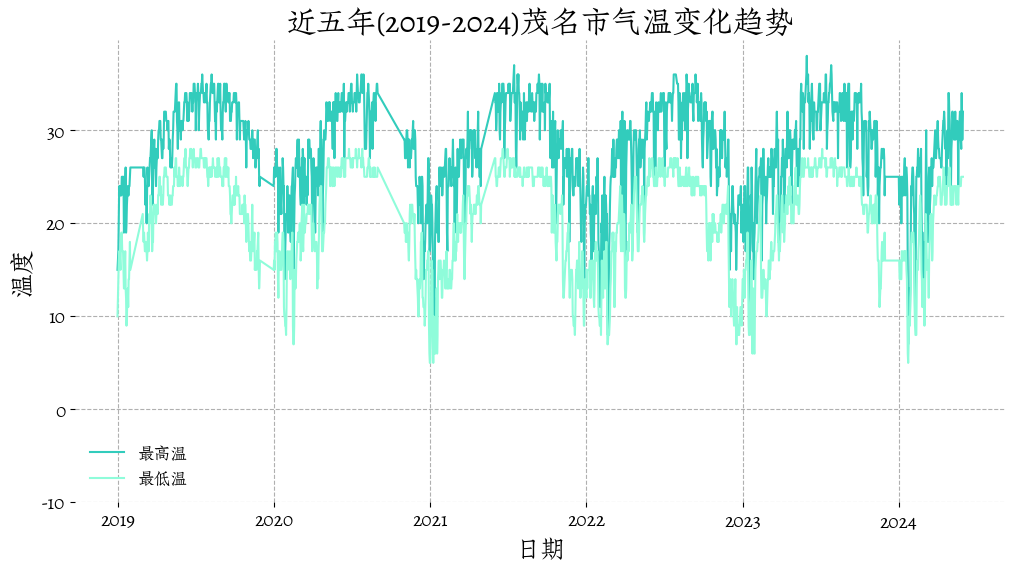

In [12]:
#画图，设置格式
fig,ax = plt.subplots(1,1,figsize=(12,6),dpi=100)

ax.plot(df["日期"], df["最高温"],label="最高温",color="#32CCBC",zorder=2)
ax.plot(df["日期"], df["最低温"],label="最低温",color="#8ffcda",zorder=2)
ax.legend(frameon=False,fontsize=12)
ax.tick_params(labelsize=14)
ax.grid(axis="both",ls="--")
ax.set_ylim(-10,)
ax.set_xlabel("日期",fontsize=18)
ax.set_ylabel("温度",fontsize=18)
ax.set_title("近五年(2019-2024)茂名市气温变化趋势",fontsize=22)

for spine in ax.spines.values():  
    spine.set_visible(False)  
plt.show()

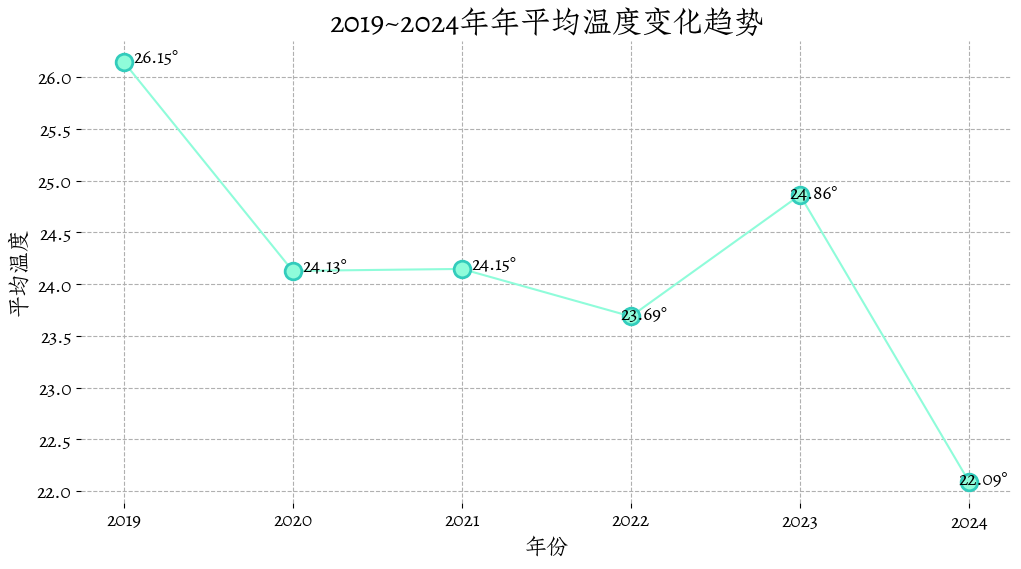

In [19]:
tmp = df.query("年份 <= 2024").groupby("年份").agg({"平均温度":"mean"}).reset_index()

fig,ax = plt.subplots(1,1,figsize=(12,6),dpi=100)

ax.plot(np.arange(len(tmp)),tmp["平均温度"],color="#8ffcda",marker="o",ms=12,mec="#32CCBC",mew=2,zorder=2)
ax.set_xticks(np.arange(len(tmp)), tmp["年份"])
ax.grid(axis="both",ls="--",zorder=1)
ax.tick_params(axis="both",labelsize=14)
ax.set_xlabel("年份",fontsize=16)
ax.set_ylabel("平均温度",fontsize=16)
for idx,row in tmp.iterrows():
    #ax.text(idx-.06, row["平均温度"]-.04, str(round(row["平均温度"],2))+"°",fontsize=14)
    if row["年份"] < 2022:
        ax.text(idx+.06, row["平均温度"]-.01, str(round(row["平均温度"],2))+"°",fontsize=14)
    else:
        ax.text(idx-.06, row["平均温度"]-.04, str(round(row["平均温度"],2))+"°",fontsize=14)
ax.set_title("2019~2024年年平均温度变化趋势",fontsize=22)  

for spine in ax.spines.values():  
    spine.set_visible(False)  
plt.show()

In [20]:
#计算天气出现的次数
tmp = df["天气"].value_counts().to_frame().reset_index()
# 计算百分比
tmp["percent"] = tmp["count"].map(lambda x:round(x/tmp["count"].sum()*100,2))
# 排名
tmp["rank"] = tmp["count"].rank(method="dense",ascending=False)
# 筛选前十
tmp = tmp.query("rank <= 10")[::-1]

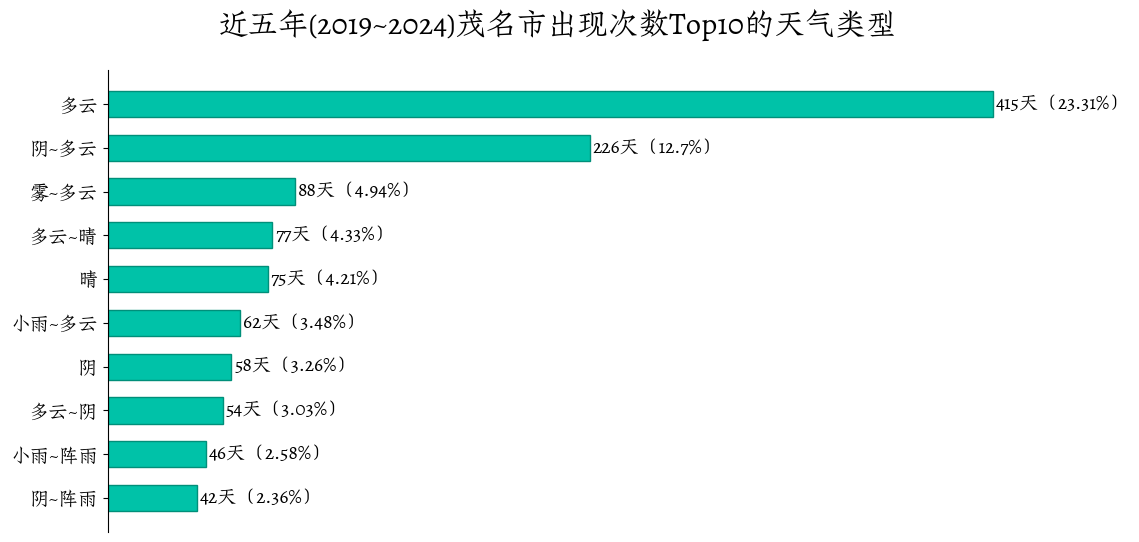

In [21]:
#设置图形参数
fig,ax = plt.subplots(1,1,figsize=(12,6),dpi=100)

b = ax.barh(tmp["天气"],tmp["percent"],height=.6,color="#00c2a8",edgecolor="#008f7a")
ax.bar_label(b,["{}天（{}%）".format(i,j) for i,j in zip(tmp["count"], tmp["percent"])],fontsize=14,padding=2)
ax.set_yticklabels(tmp["天气"],fontsize=14)
ax.set_xticks([])

for spine in ax.spines.values():  
    spine.set_visible(False)  
ax.spines["left"].set_visible(True) 
fig.suptitle("近五年(2019~2024)茂名市出现次数Top10的天气类型",fontsize=22)
plt.show()

In [22]:
#计算风向次数
tmp = df["风向"].value_counts().to_frame().reset_index()
# 计算百分比
tmp["percent"] = tmp["count"].map(lambda x:round(x/tmp["count"].sum()*100,2))

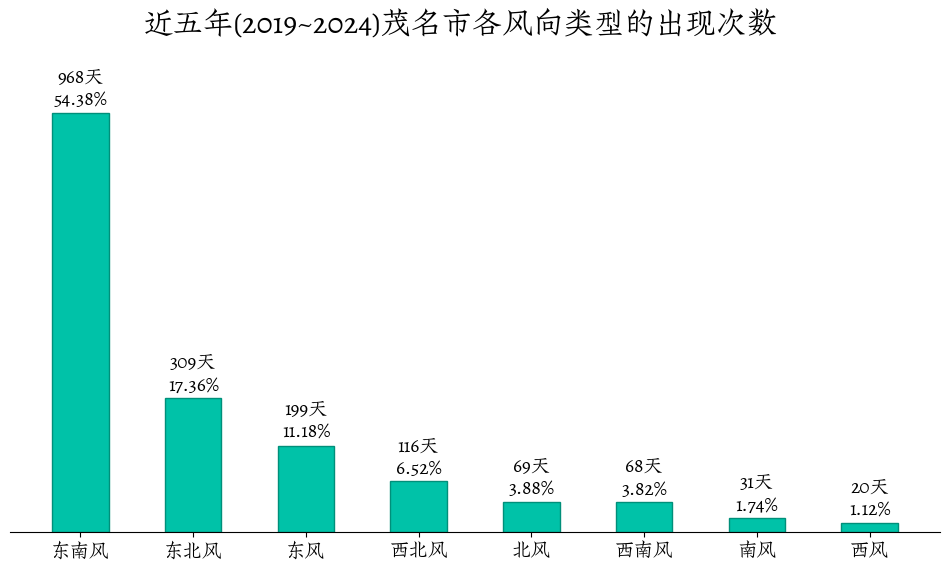

In [26]:
fig,ax = plt.subplots(1,1,figsize=(12,6),dpi=100)

b = ax.bar(tmp["风向"],tmp["percent"],width=.5,color="#00c2a8",edgecolor="#008f7a")
ax.bar_label(b,["{}天\n{}%".format(i,j) for i,j in zip(tmp["count"], tmp["percent"])],fontsize=14,padding=2)
ax.set_ylim(0,60)
ax.set_xticklabels(tmp["风向"],fontsize=14)
ax.set_yticks([])

for spine in ax.spines.values():  
    spine.set_visible(False)  
ax.spines["bottom"].set_visible(True) 
fig.suptitle("近五年(2019~2024)茂名市各风向类型的出现次数",fontsize=22)
plt.show()

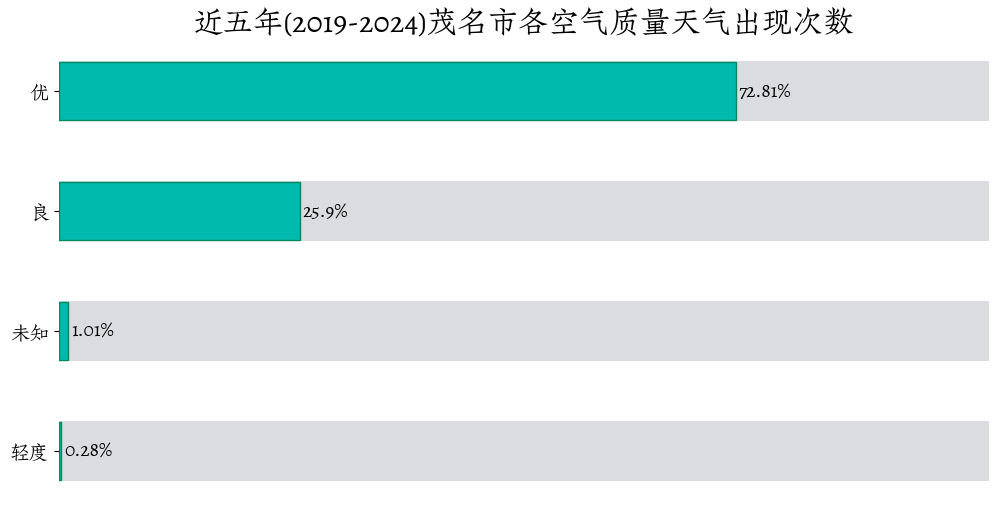

In [27]:
tmp = df["空气质量指数标签"].value_counts().to_frame().reset_index()
# 计算百分比
tmp["percent"] = tmp["count"].map(lambda x:round(x/tmp["count"].sum()*100,2))
# 排序规则
tmp = tmp[::-1]

# 画图格式
tmp["空气质量指数标签"].replace("-","未知",inplace=True)
fig,ax = plt.subplots(1,1,figsize=(12,6),dpi=100)

b1 = ax.barh(tmp["空气质量指数标签"],100,height=.5,color="#b8bbc0",alpha=.5)
b2 = ax.barh(tmp["空气质量指数标签"],tmp["percent"],height=.48,color="#00baad",edgecolor="#008a5e")
ax.set_xlim(0,100)
ax.set_xticks([])
ax.tick_params(axis="y",labelsize=14)
ax.bar_label(b2,padding=2,fmt="%s%%",fontsize=14)
ax.set_title("近五年(2019-2024)茂名市各空气质量天气出现次数",fontsize=22)

for spine in ax.spines.values():  
    spine.set_visible(False) 
plt.show()

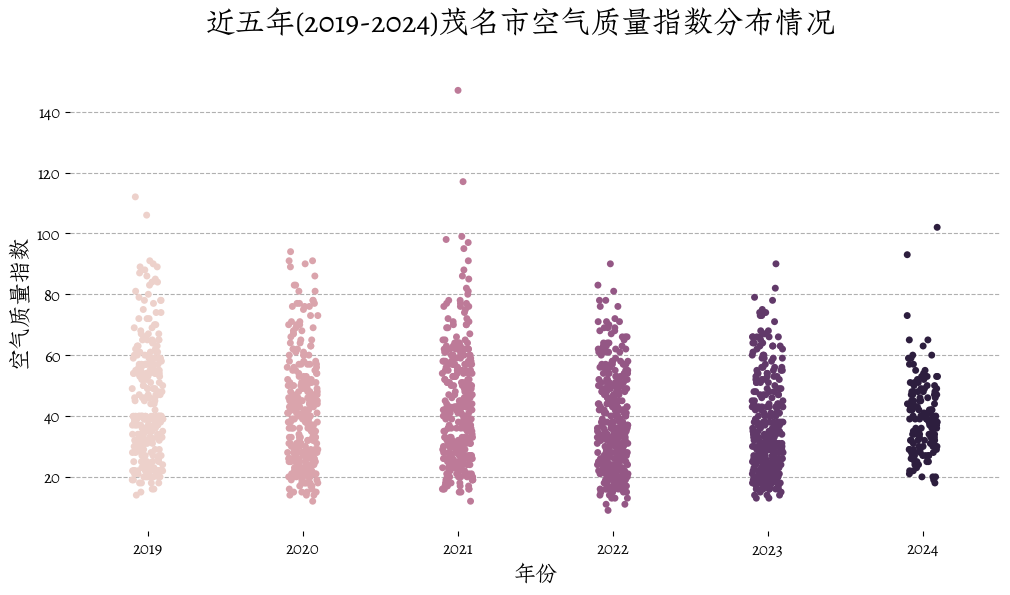

In [28]:
fig,ax = plt.subplots(1,1,figsize=(12,6),dpi=100)

sns.stripplot(x="年份",y="空气质量指数",hue="年份",data=df,ax=ax,zorder=2)
ax.grid(axis="y",ls="--",zorder=1)
ax.legend().set_visible(False)
ax.tick_params(axis="both",labelsize=12)
ax.set_xlabel("年份",fontsize=16)
ax.set_ylabel("空气质量指数",fontsize=16)

for spine in ax.spines.values():  
    spine.set_visible(False) 
fig.suptitle("近五年(2019-2024)茂名市空气质量指数分布情况",fontsize=22)
plt.show()